In [16]:
import numpy as np
import matplotlib.pyplot as plt

from idtxl.multivariate_te import MultivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network

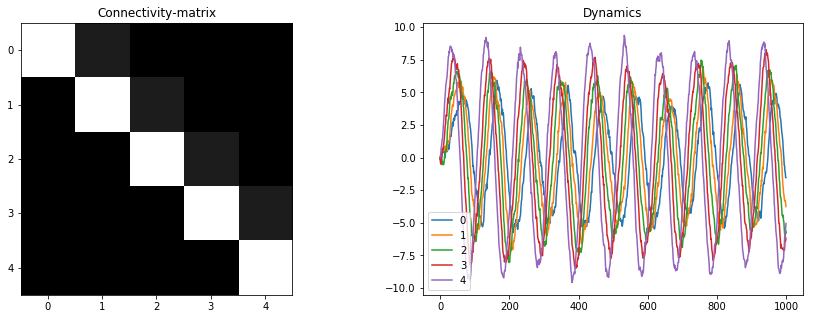

In [39]:
################################
# Create Interaction matrix
################################
alpha = 0.9
N_NODE = 5
M = np.zeros((N_NODE, N_NODE))
for i in range(N_NODE):
    M[i,i] = alpha

for i in range(N_NODE-1):
    M[i, i + 1] = 1 - alpha

################################
# Create data
################################
N_DATA = 1000
data = np.zeros((N_NODE, N_DATA))
for i in range(1, N_DATA):
    data[:, i] = M.dot(data[:, i-1])
    data[N_NODE-1, i] += np.sin(2 * np.pi * i / 100)
    data[:, i] += np.random.normal(0, 0.2, 5)
    
################################
# Plot
################################
    
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].imshow(M, cmap="gray")
ax[0].set_title("Connectivity-matrix")
for j in range(N_NODE):
    ax[1].plot(data[j], label=str(j))
ax[1].legend()
ax[1].set_title("Dynamics")
plt.show()

Adding data with properties: 5 processes, 1000 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4]

Target: 0 - testing sources [1, 2, 3, 4]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]
testing candidate: (1, 1) maximum statistic, n_perm: 200
testing candidate: (3, 1) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(1, 1)]
 -- significant

--------------

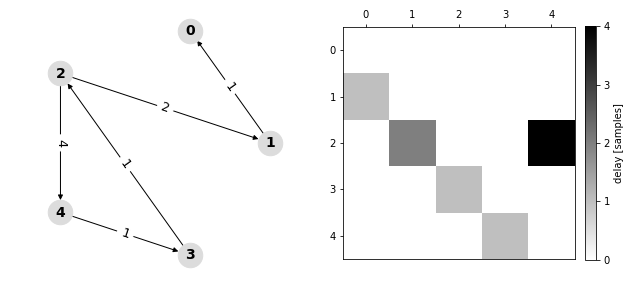

In [40]:
# a) Convert data to ITDxl format
dataIDTxl = Data(data, dim_order='ps')

# b) Initialise analysis object and define settings
network_analysis = MultivariateTE()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 5,
            'min_lag_sources': 1}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=dataIDTxl)

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()